In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#load provided csv file
df = pd.read_csv("fev.csv")
df

,age,height,sex,smoke,fev
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895
...,...,...,...,...,...
649,16,67.0,1,1,4.270
650,15,68.0,1,1,3.727
651,18,60.0,0,0,2.853
652,16,63.0,0,1,2.795


In [4]:
df.describe()

,age,height,sex,smoke,fev
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,9.931193,61.143578,0.513761,0.099388,2.636780
std,2.953935,5.703513,0.500193,0.299412,0.867059
min,3.000000,46.000000,0.000000,0.000000,0.791000
25%,8.000000,57.000000,0.000000,0.000000,1.981000
50%,10.000000,61.500000,1.000000,0.000000,2.547500
75%,12.000000,65.500000,1.000000,0.000000,3.118500
max,19.000000,74.000000,1.000000,1.000000,5.793000


In [108]:
#4 subgroups can be created with the two categorical variables
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]

In [109]:
df_F_nonsmoker.describe()

,age,height,sex,smoke,fev
count,279.000000,279.000000,279.0,279.0,279.000000
mean,9.365591,59.605376,0.0,0.0,2.379211
std,2.693390,4.738660,0.0,0.0,0.639263
min,3.000000,46.000000,0.0,0.0,0.791000
25%,8.000000,57.000000,0.0,0.0,1.877500
50%,9.000000,60.500000,0.0,0.0,2.417000
75%,11.000000,63.000000,0.0,0.0,2.865000
max,18.000000,71.000000,0.0,0.0,3.816000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

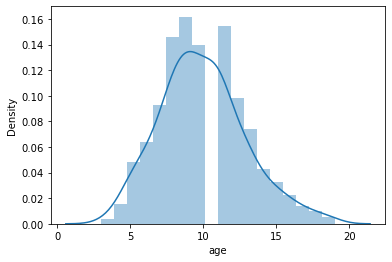

In [15]:
sns.distplot(df.age)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

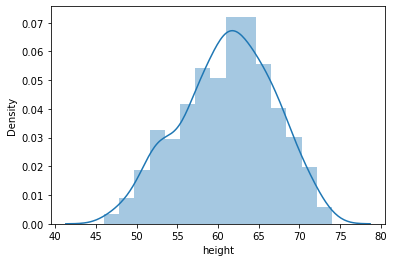

In [10]:
sns.distplot(df.height)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fev', ylabel='Density'>

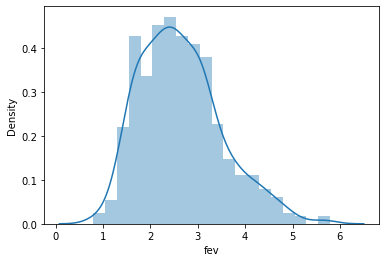

In [11]:
sns.distplot(df.fev)

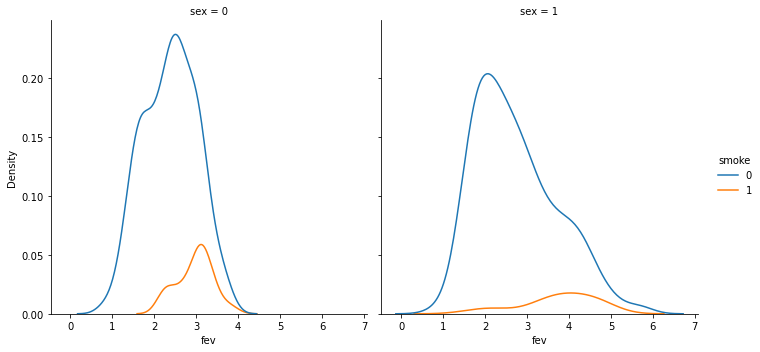

In [106]:



sns.displot(data=df, x="fev", hue="smoke", col="sex", kind="kde")
#place mean lines

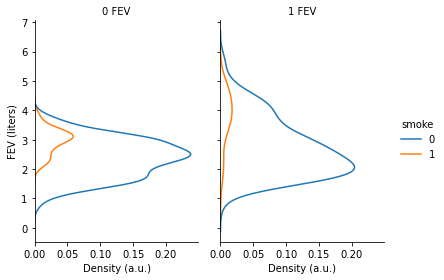

In [21]:
g = sns.displot(
    data=df, y="fev", hue="smoke", col="sex",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "FEV (liters)")
g.set_titles("{col_name} FEV")

#place mean lines?

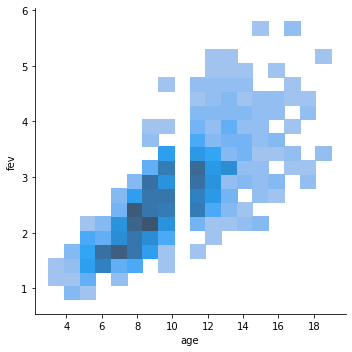

In [19]:
sns.displot(data=df, x="age", y="fev")

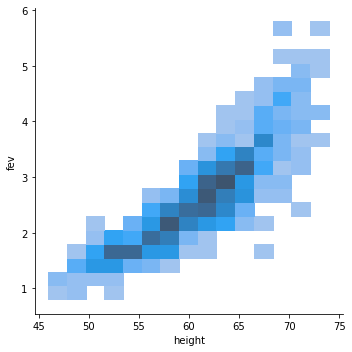

In [20]:
sns.displot(data=df, x="height", y="fev")

(0.0, 14.0)

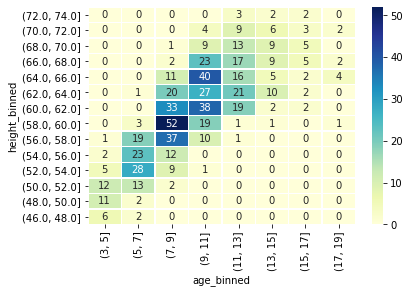

In [88]:
#height min and max
height_min = min(df['height'])
height_max = max(df['height'])

#age min and max
age_min = min(df['age'])
age_max = max(df['age'])

height_bins_step = 2
height_bins = np.arange(height_min, height_max+height_bins_step, height_bins_step)

age_bins_step = 2
age_bins = np.arange(age_min, age_max+age_bins_step, age_bins_step)

df['height_binned'] = pd.cut(df['height'], height_bins)
df['age_binned'] = pd.cut(df['age'], age_bins)

df_new = df.groupby(['height_binned', 'age_binned']).size().reset_index(name='count') #wrangle count data

df_new = df_new.pivot("height_binned", "age_binned", "count")
ax = sns.heatmap(df_new, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.ylim(reversed(plt.ylim()))

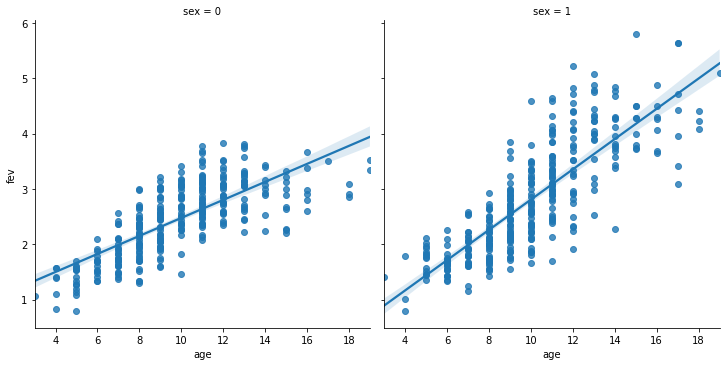

In [94]:
sns.lmplot(x="age", y="fev" ,data=df, col='sex')

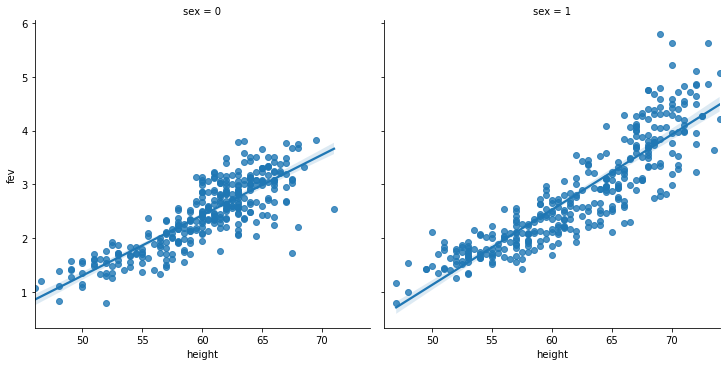

In [95]:
sns.lmplot(x="height", y="fev" ,data=df, col='sex')